
[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


STD Series: From 0.1 to 6.283185307179586
Generated 91 samples for mean -3.141592653589793 and std 0.1, min: -3.4336799005697354, max: -2.88802824506723
Generated 100 input values for mean -3.141592653589793 and std 0.1
Generated 100 cartesian products for mean -3.141592653589793 and std 0.1
Generated 91 samples for mean -3.141592653589793 and std 0.16245641724423826, min: -3.594243052674699, max: -2.642993240673011
Generated 100 input values for mean -3.141592653589793 and std 0.16245641724423826
Generated 100 cartesian products for mean -3.141592653589793 and std 0.16245641724423826
Generated 91 samples for mean -3.141592653589793 and std 0.2249128344884765, min: -3.7205399374187302, max: -2.688580455185534
Generated 100 input values for mean -3.141592653589793 and std 0.2249128344884765
Generated 100 cartesian products for mean -3.141592653589793 and std 0.2249128344884765
Generated 91 samples for mean -3.141592653589793 and std 0.28736925173271477, min: -3.8911721159682577, max: -2

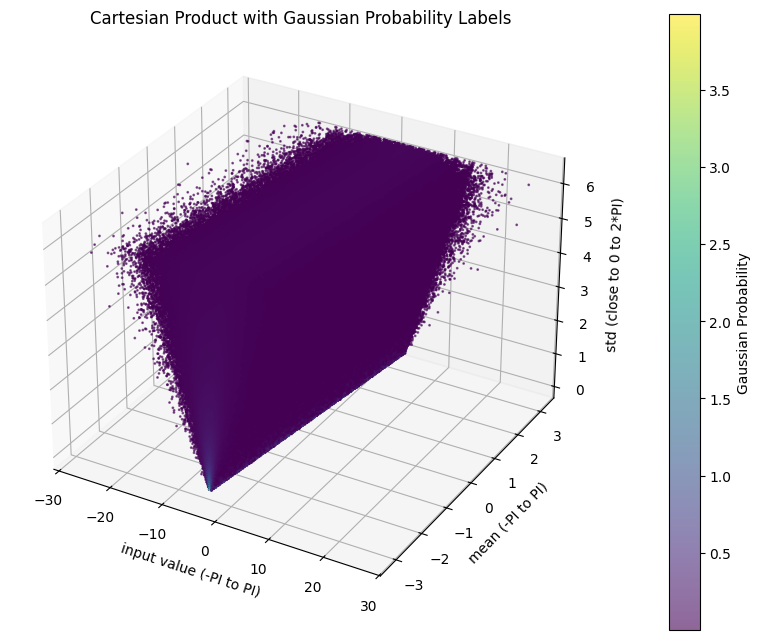

In [1]:
# Install necessary dependencies
!pip install numpy pandas matplotlib

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Step 1: Generate the series
num_values = 100


# STD Series: From a very small number close to 0 to 2*PI, to insure wide representation of std values. Low ones having a "sharper" curve, higher ones having a "flatter" curve.
# Potentially want to distribute it more over the higher numebrs, since lower numbers are less likely to be used in practice.
small_number = 0.1
std = np.linspace(small_number, 2*np.pi, num_values)
print(f"STD Series: From {std.min()} to {std.max()}")

# Mean Series: From -PI to +PI, just a wide range to shift the center of the curve to different locations.
mean = np.linspace(-np.pi, np.pi, num_values)

# Now for each std and mean, we want to generate a set of 100 input values for each mean std pair, resulting in 100 * 100 * 100 = 1,000,000 input values in the end.
# We want input values to be distributed around the mean, with a maximum of 3 standard deviations away from the mean.
# Input values further away from the mean should be rarer, with more existing closer to the mean.
cartesian_product = []
for m, s in itertools.product(mean, std):
    # Generate Input values
    inputval = [m - 2 * s, m - 1.5 * s, m - 1 * s, m - 0.5 * s, m, m + 0.5 * s, m + 1 * s, m + 1.5 * s, m + 2 * s]
    # Maybe there is a better way than normal random samples to insure some low values are present, but this is a simple way
    samples = np.random.normal(m, s, num_values - 9)
    print(f"Generated {len(samples)} samples for mean {m} and std {s}, min: {samples.min()}, max: {samples.max()}")
    inputval.extend(samples)
    print(f"Generated {len(inputval)} input values for mean {m} and std {s}")
    # Make cartesian product for input values and m, s
    cartesian_product_input = list(itertools.product(inputval, [m], [s]))
    print(f"Generated {len(cartesian_product_input)} cartesian products for mean {m} and std {s}")
    cartesian_product.extend(cartesian_product_input)

print(f"Generated {len(cartesian_product)} cartesian products in total")

# Convert to a pandas DataFrame for better visualization
cartesian_df = pd.DataFrame(cartesian_product, columns=['Series1', 'Series2', 'Series3'])

# Step 3: Compute the labels using the Gaussian probability function
def gaussian_probability(x, y, z):
    return (1 / (np.sqrt(2 * np.pi) * z)) * np.exp(-((x - y) ** 2) / (2 * z ** 2))

cartesian_df['Label'] = cartesian_df.apply(lambda row: gaussian_probability(row['Series1'], row['Series2'], row['Series3']), axis=1)


# Display the first few rows of the DataFrame with labels
print(cartesian_df.head())

# Step 4: Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract Cartesian values for plotting
x = cartesian_df['Series1']
y = cartesian_df['Series2']
z = cartesian_df['Series3']
labels = cartesian_df['Label']

# Scatter plot with color representing the labels
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis', s=1, alpha=0.6)

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Gaussian Probability')

# Label the axes
ax.set_xlabel('input value (-PI to PI)')
ax.set_ylabel('mean (-PI to PI)')
ax.set_zlabel('std (close to 0 to 2*PI)')

plt.title('Cartesian Product with Gaussian Probability Labels')
plt.show()


In [2]:
labels.head()

0    0.539910
1    1.295176
2    2.419707
3    3.520653
4    3.989423
Name: Label, dtype: float64

In [3]:
labels.describe()

count    1.000000e+06
mean     1.984863e-01
std      3.921740e-01
min      7.350281e-07
25%      5.566338e-02
50%      8.662285e-02
75%      1.695608e-01
max      3.989423e+00
Name: Label, dtype: float64

In [4]:
import numpy as np

# Example labels (replace with your actual labels)
labels = cartesian_df['Label']

labels.quantile(0.93)

np.float64(0.5476562035069629)

(array([1.56371e+05, 2.99920e+05, 1.85417e+05, 9.21690e+04, 5.52730e+04,
        3.66680e+04, 2.63370e+04, 1.96430e+04, 1.52360e+04, 1.23840e+04,
        1.06500e+04, 8.27000e+03, 7.04200e+03, 6.51800e+03, 5.19300e+03,
        4.17300e+03, 4.66800e+03, 2.96800e+03, 3.89300e+03, 2.23200e+03,
        3.05100e+03, 2.51600e+03, 1.60200e+03, 2.22500e+03, 2.14200e+03,
        1.27100e+03, 1.51000e+03, 1.55800e+03, 2.22300e+03, 7.11000e+02,
        9.42000e+02, 8.08000e+02, 1.10500e+03, 1.11200e+03, 2.10200e+03,
        3.94000e+02, 4.22000e+02, 6.57000e+02, 5.11000e+02, 6.84000e+02,
        5.47000e+02, 6.72000e+02, 7.45000e+02, 9.97000e+02, 1.37100e+03,
        1.93000e+02, 2.02000e+02, 2.30000e+02, 2.44000e+02, 2.47000e+02,
        2.49000e+02, 2.68000e+02, 2.73000e+02, 2.60000e+02, 5.07000e+02,
        3.23000e+02, 3.49000e+02, 4.09000e+02, 4.61000e+02, 5.10000e+02,
        8.52000e+02, 1.19700e+03, 5.10000e+01, 7.80000e+01, 6.40000e+01,
        7.80000e+01, 9.00000e+01, 8.40000e+01, 8.60

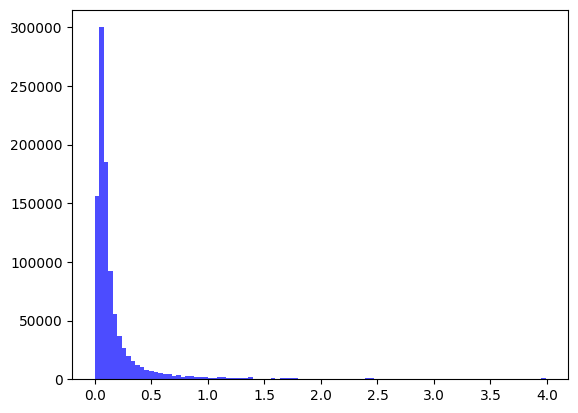

In [5]:
import numpy as np
import pandas as pd

# Assuming cartesian_df is your DataFrame with 'Label' column
# Step 1: Apply log transformation to the labels (to handle very small values)
#cartesian_df['Label'] = np.log1p(cartesian_df['Label'])  # log1p to handle values close to 0

cartesian_df['Label'].describe()
plt.hist(cartesian_df['Label'], bins=100, color='blue', alpha=0.7, label='Label Distribution')

In [6]:
cartesian_df['Label'].quantile(0.9)

np.float64(0.40146677562573807)

In [7]:
# Do duplicate rows exist?
duplicates = cartesian_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [8]:
# Install necessary dependency
!pip install scikit-learn

from sklearn.model_selection import train_test_split
import os

# Step 1: Split the data into an 80/20 train/test set
train_df, test_df = train_test_split(cartesian_df, test_size=0.2, train_size=0.8, random_state=42)

# Step 2: Save the datasets to files
output_folder = "./"
train_file = os.path.join(output_folder, "train_data_third_dataset.csv")
test_file = os.path.join(output_folder, "test_data_third_dataset.csv")

# Save as CSV files
train_df.to_csv(train_file, index=False)
test_df.to_csv(test_file, index=False)

print(f"Train dataset saved to {train_file}")
print(f"Test dataset saved to {test_file}")



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Train dataset saved to ./train_data_third_dataset.csv
Test dataset saved to ./test_data_third_dataset.csv


In [9]:
train_df["Label"].describe()

count    8.000000e+05
mean     1.981408e-01
std      3.910750e-01
min      7.350281e-07
25%      5.566624e-02
50%      8.658427e-02
75%      1.695132e-01
max      3.989423e+00
Name: Label, dtype: float64

In [10]:
test_df["Label"].describe()

count    200000.000000
mean          0.199868
std           0.396538
min           0.000004
25%           0.055553
50%           0.086774
75%           0.169757
max           3.989423
Name: Label, dtype: float64

In [11]:
# identify outliers
cut_off = train_df["Label"].std() * 3
data_mean = train_df["Label"].mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train_df["Label"].values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in train_df["Label"].values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

outlieres_removed_series = pd.Series(outliers_removed)
print(outlieres_removed_series.describe())
outlieres_removed_series.quantile(0.50)

Identified outliers: 17287
Non-outlier observations: 782713
count    7.827130e+05
mean     1.506949e-01
std      1.915155e-01
min      7.350281e-07
25%      5.490810e-02
50%      8.470020e-02
75%      1.595122e-01
max      1.371341e+00
dtype: float64


np.float64(0.0847002020078183)

In [12]:
# now do the same for the outliers removed series
cut_off = outlieres_removed_series.std() * 3
data_mean = outlieres_removed_series.mean()
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in outlieres_removed_series.values if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in outlieres_removed_series.values if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 22956
Non-outlier observations: 759757


In [13]:
outliers_removed_series2 = pd.Series(outliers_removed)
outliers_removed_series2.describe()

count    7.597570e+05
mean     1.256901e-01
std      1.242392e-01
min      7.350281e-07
25%      5.377963e-02
50%      8.243555e-02
75%      1.481739e-01
max      7.251759e-01
dtype: float64

(array([12693., 22909., 22285., 26024., 26448., 30256., 33813., 38799.,
        53268., 54272., 44349., 37118., 30956., 27312., 22998., 20806.,
        17617., 15608., 14477., 12537., 11607., 10911.,  9609.,  8740.,
         8226.,  7515.,  7088.,  6359.,  5893.,  5546.,  5371.,  4923.,
         4373.,  4319.,  4329.,  4129.,  3203.,  3675.,  3599.,  2712.,
         3246.,  2404.,  3133.,  2166.,  3031.,  1876.,  2361.,  2345.,
         1661.,  2399.,  1907.,  1729.,  1881.,  1676.,  1274.,  1650.,
         1858.,  1205.,  1219.,  1451.,  1553.,  1144.,  1398.,  1193.,
         1674.,   802.,   861.,  1028.,  1017.,  1641.,   790.,   672.,
          743.,   923.,  1043.,  1513.,   549.,   540.,   592.,   846.,
          988.,   744.,  1074.,   753.,   438.,   478.,   481.,   531.,
          566.,   635.,   854.,  1172.,   328.,   364.,   362.,   531.,
          403.,   420.,   478.,   491.]),
 array([7.35028093e-07, 7.25248695e-03, 1.45042389e-02, 2.17559908e-02,
        2.90077427e-02

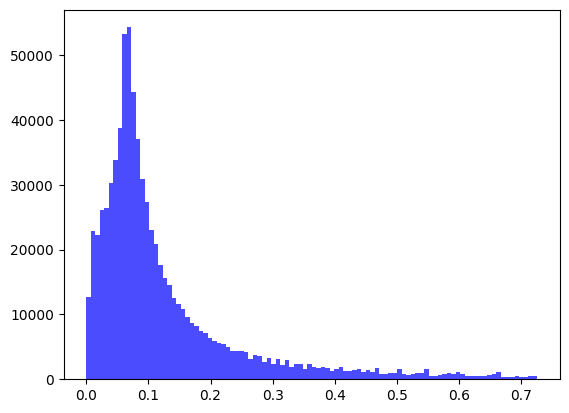

In [14]:
# plot the distribution of the outliers removed series 2
plt.hist(outliers_removed_series2, bins=100, color='blue', alpha=0.7, label='Outliers Removed')